# Assingment 4

#### *Piyush Chawla*

## Adult Dataset

For this dataset, we will use the output file from assignment 1. As discussed in assignment 1 some redundant attributes have been eliminated and some new attributes are introduced. The code below gives the names of all the final 12 attributes.

In [183]:
import pandas as pd
data = pd.read_csv('adult.data.new')
data = data[list(data.keys())[1:]]
print(list(data.keys()))

['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain-2', 'hours-per-week', 'native-country', 'income']


Some attributes are currently in their nominal form (strings). Therefore, we first convert such attributes into integers. For example, '<=50K' in income is mapped to integer 0 and '>50K' to 1.

In [184]:
def toint(key):
    labels,levels = pd.factorize(data[key])
    data[key] = labels
for i in data.keys():
    if 'unique' in data[i].describe():
        toint(i)

Out of all the 12 attributes, only 'capital-gain-2' (combination of capital gain and capital loss obtained in assignment 1) requires normalization. So we normalize it in the code below.

In [185]:
from sklearn.preprocessing import normalize
data['capital-gain-2'] = normalize(np.array(data['capital-gain-2']).reshape(1, -1))[0]

For this dataset, we will user four classifiers namely, Random Forest, Logistic Regression, MLP (Neural Networks) and AdaBoost. We use a single partition method for validation (and choosing the right hyper-parameters). The data is divided into the train (70%), test (15%) and validation (15%).
We keep the test data aside and choose the final classifier (by varying the hyper-parameters as per validation performance). One we have a classifier that works good on valid data, we use the test data and obtain the accuracy by using different measures like AUC, ROC curve, simple accuracy, Precision, Recall, and F-1.

### Random Forest

The best hyper-parameters were found to be 100 estimators (trees) and max depth of 100 for each tree.

Train Accuracy 0.9786328536328537
Valid Accuracy 0.8472876151484136
Test Accuracy 0.8562653562653563
confusion matrix (validation)= [[3452  334]
 [ 412  687]]
precision (validation) = 0.8933747412008282
recall (validation) = 0.9117802430005283
F-1 (validation) = 0.902483660130719
AUC (validation) = 0.7684469913819749


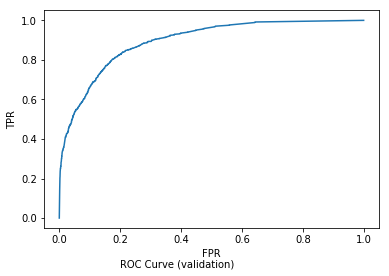

confusion matrix (test)= [[3483  281]
 [ 421  699]]
precision (test) = 0.8921618852459017
recall (test) = 0.925345377258236
F-1 (test) = 0.9084507042253522
AUC (test) = 0.7747262600576895


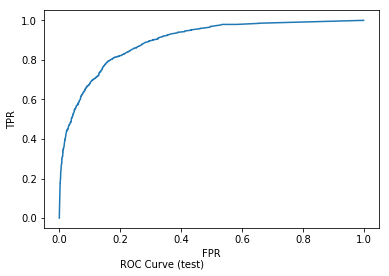

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

_data = np.array(data)
X = _data[:,:-1]
y = _data[:,-1]
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

clf.fit(X_train,y_train)

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score

print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Valid Accuracy ' + str(accuracy_score(clf.predict(X_valid),y_valid)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (validation)= '+ str(confusion_matrix(y_valid,clf.predict(X_valid))))
prfs = precision_recall_fscore_support(y_valid,clf.predict(X_valid))
print('precision (validation) = ' +str(prfs[0][0]))
print('recall (validation) = ' +str(prfs[1][0]))
print('F-1 (validation) = ' +str(prfs[2][0]))
print('AUC (validation) = '+ str(roc_auc_score(y_valid,clf.predict(X_valid))))
fpr,tpr,th = roc_curve(y_valid,clf.predict_proba(X_valid)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-0.01,'ROC Curve (validation)')
plt.show()

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

### Logistic Regression

This model does not converge, even when the solver and iterations are varied. The best hyper-parameters were **lbfgzs** solver and max iterations of 100.

/home/chawla/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Train Accuracy 0.7652685152685152
Valid Accuracy 0.7862845445240533
Test Accuracy 0.7786650286650286
confusion matrix (validation)= [[3584  202]
 [ 842  257]]
precision (validation) = 0.8097605061003164
recall (validation) = 0.9466455361859483
F-1 (validation) = 0.8728689722357525
AUC (validation) = 0.5902472448900624


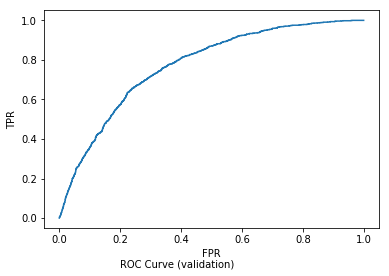

confusion matrix (test)= [[3547  217]
 [ 864  256]]
precision (test) = 0.804126048515076
recall (test) = 0.9423485653560042
F-1 (test) = 0.8677675840978593
AUC (test) = 0.5854599969637163


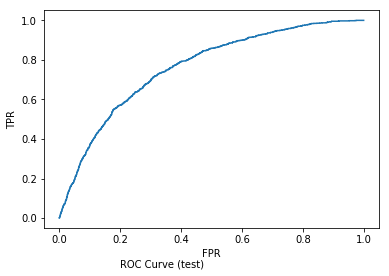

In [187]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial', max_iter = 100)

clf.fit(X_train,y_train)

print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Valid Accuracy ' + str(accuracy_score(clf.predict(X_valid),y_valid)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (validation)= '+ str(confusion_matrix(y_valid,clf.predict(X_valid))))
prfs = precision_recall_fscore_support(y_valid,clf.predict(X_valid))
print('precision (validation) = ' +str(prfs[0][0]))
print('recall (validation) = ' +str(prfs[1][0]))
print('F-1 (validation) = ' +str(prfs[2][0]))
print('AUC (validation) = '+ str(roc_auc_score(y_valid,clf.predict(X_valid))))
fpr,tpr,th = roc_curve(y_valid,clf.predict_proba(X_valid)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-0.01,'ROC Curve (validation)')
plt.show()

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

### MLP Classifier

For this model, the hidden layer size of 100 gave good results. On reducing the layer size, the model does not converge. On increasing the size of the hidden layer the model takes a lot of time to train and gives almost the same results.

Train Accuracy 0.8228325728325728
Valid Accuracy 0.8311156601842374
Test Accuracy 0.8286240786240786
confusion matrix (validation)= [[3534  252]
 [ 573  526]]
precision (validation) = 0.860482103725347
recall (validation) = 0.9334389857369255
F-1 (validation) = 0.8954770049410871
AUC (validation) = 0.7060279551068612


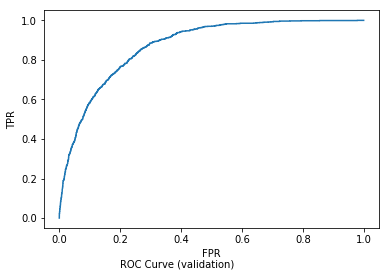

confusion matrix (test)= [[3502  262]
 [ 575  545]]
precision (test) = 0.8589649251900907
recall (test) = 0.9303931987247609
F-1 (test) = 0.8932534115546485
AUC (test) = 0.7085001707909518


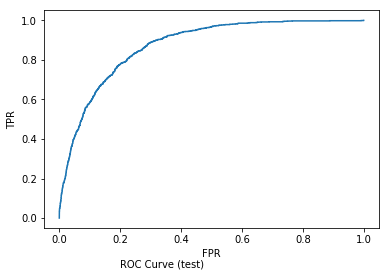

In [188]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, ))

clf.fit(X_train,y_train)

print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Valid Accuracy ' + str(accuracy_score(clf.predict(X_valid),y_valid)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (validation)= '+ str(confusion_matrix(y_valid,clf.predict(X_valid))))
prfs = precision_recall_fscore_support(y_valid,clf.predict(X_valid))
print('precision (validation) = ' +str(prfs[0][0]))
print('recall (validation) = ' +str(prfs[1][0]))
print('F-1 (validation) = ' +str(prfs[2][0]))
print('AUC (validation) = '+ str(roc_auc_score(y_valid,clf.predict(X_valid))))
fpr,tpr,th = roc_curve(y_valid,clf.predict_proba(X_valid)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-0.01,'ROC Curve (validation)')
plt.show()

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

### AdaBoost Classifier

For this model, the default estimator (DecisionTree with max depth 1) gives good results. On changing the estimator the performance is almost the same (some metrics improve and some values drop).

Train Accuracy 0.8560898560898561
Valid Accuracy 0.8642784032753327
Test Accuracy 0.8581081081081081
confusion matrix (validation)= [[3563  223]
 [ 440  659]]
precision (validation) = 0.8900824381713714
recall (validation) = 0.9410987849973587
F-1 (validation) = 0.9148799589164206
AUC (validation) = 0.7703674088772053


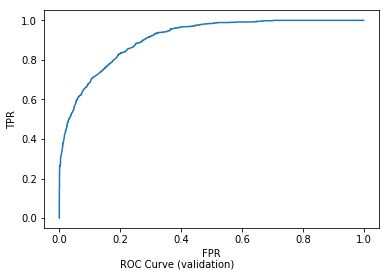

confusion matrix (test)= [[3518  246]
 [ 447  673]]
precision (test) = 0.8872635561160152
recall (test) = 0.934643995749203
F-1 (test) = 0.9103376892224091
AUC (test) = 0.76776842644603


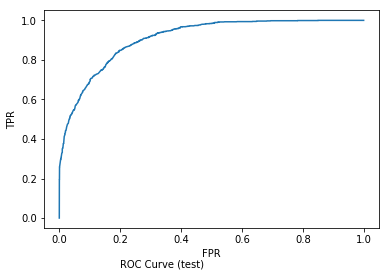

In [189]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train,y_train)

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score

print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Valid Accuracy ' + str(accuracy_score(clf.predict(X_valid),y_valid)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (validation)= '+ str(confusion_matrix(y_valid,clf.predict(X_valid))))
prfs = precision_recall_fscore_support(y_valid,clf.predict(X_valid))
print('precision (validation) = ' +str(prfs[0][0]))
print('recall (validation) = ' +str(prfs[1][0]))
print('F-1 (validation) = ' +str(prfs[2][0]))
print('AUC (validation) = '+ str(roc_auc_score(y_valid,clf.predict(X_valid))))
fpr,tpr,th = roc_curve(y_valid,clf.predict_proba(X_valid)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-0.01,'ROC Curve (validation)')
plt.show()

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

We see that logistic regression fails to converge but still performs pretty well. Out of all the classifiers MLP and AdaBoost have highest accuracies **0.8563** and **0.8581** respectively. Both of these classifiers beat all others in terms of the rest of the metrics as well. Both these models (AdaBoost and RandomForest) have almost similar values for all the metrics on test data. Even the ROC curves are very similar. Therefore we can use any of these models as the final classifier for the adult dataset.

## Wine Dataset

For this task, we use the final version of wine dataset in the assignment. Since there were different binning techniques, each with its own advantages and disadvantage, we stick to the non-binned data. But we use normalization since un-normalized data might give a lower performance (as some attributes might be favored over others). This might not be an issue for models like K-NN but we still use the same normalized dataset for all the models, so that the results can be compared.

For this dataset, we use k-cross-validation approach (where k=10 for all the models). We run the model on k-cross-validation and obtain the average validation accuracy. After this, we train the data on the entire data used for k-cross-validation and obtain the train and test scores (accuracy). For validation metrics (AUC, Precision, Recall etc.) we use the same approach as used for accuracy. We take the average values of all these metrics. For ROC curve we plot the curve for first cross-validation iteration because different iterations have a different number of thresholds. Also, since we take an average of confusion matrices, entries might not be integers.

The final model in each of the techniques is the one which gives the highest validation accuracy. In this notebook, we only see the final hyper-parameters to keep the discussion brief.

The code below gives a function **kcross()** for doing the k-cross-validation analysis.

In [195]:
def kcross(clf,X,y,k):
    val = []
    auc = []
    f1 = []
    precision = []
    recall = []
    confusion = []
    tpr = []
    fpr = []
    th = []
    for i in range(k):
        s = int(len(X)*(i/k))
        e = int(len(X)*((i+1)/k))
        X_train = np.concatenate((X[:s],X[e:]))
        y_train = np.concatenate((y[:s],y[e:]))
        X_valid = X[s:e]
        y_valid = y[s:e]
        clf.fit(X_train,y_train)
        confusion.append(confusion_matrix(y_test,clf.predict(X_test)))
        val.append(accuracy_score(clf.predict(X_valid),y_valid))
        prfs = precision_recall_fscore_support(y_valid,clf.predict(X_valid))
        precision.append(prfs[0][0])
        recall.append(prfs[1][0])
        f1.append(prfs[2][0])
        auc.append(roc_auc_score(y_valid,clf.predict(X_valid)))
        _fpr,_tpr,_th = roc_curve(y_valid,clf.predict_proba(X_valid)[:,1])
        fpr.append(_fpr)
        tpr.append(_tpr)
        th.append(_th)

    print('confusion matrix (validation)= '+ str(np.mean(confusion,axis=0)))
    print('precision (validation) = ' +str(np.mean(precision)))
    print('recall (validation) = ' +str(np.mean(recall)))
    print('F-1 (validation) = ' +str(np.mean(f1)))
    print('AUC (validation) = '+ str(np.mean(auc)))
    fig = plt.figure()
    plt.plot(fpr[0],tpr[0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    fig.text(0.3,-.01,'ROC Curve (validation)')
    plt.show()
    clf.fit(X,y)
    print('Average Valid Accuracy:'+' = '+str(np.mean(val)))
    return clf
        
        

The code below does normalization on each attribute and then creates train (70%) and test (30%) split. It should be noted that since we are using k-cross-validation, we don't need validation set in this case. The train data will be divided into multiple validation sets (for each of k iterations).

In [196]:
wine = pd.read_csv('winequality-red.csv',sep=';')
wine.iloc[0]
tmp = []

for i in range(len(wine)):
    if wine['quality'].iloc[i]<= 5:
        tmp.append(0)
    else:
        tmp.append(1)
wine['quality'] = tmp

for i in list(wine.keys()):
    if i == 'quality':
        continue
    else:
        wine[i] = normalize(np.array(wine[i]).reshape(1, -1))[0]

In [197]:
_data = np.array(wine)
X = _data[:,:-1]
y = _data[:,-1]
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Random Forest

For this model, the best hyper-parameters were found to be 100 estimators each with a max depth of 20.

confusion matrix (validation)= [[187.5  42.5]
 [ 50.9 199.1]]
precision (validation) = 0.7802346176119596
recall (validation) = 0.7819899293316469
F-1 (validation) = 0.7780447612556027
AUC (validation) = 0.7973413919294721


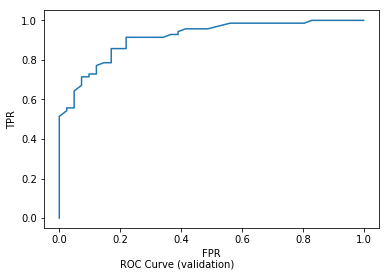

Average Valid Accuracy: = 0.7962596525096526
Train Accuracy 1.0
Test Accuracy 0.8145833333333333
confusion matrix (test)= [[190  40]
 [ 49 201]]
precision (test) = 0.7949790794979079
recall (test) = 0.8260869565217391
F-1 (test) = 0.810234541577825
AUC (test) = 0.8150434782608696


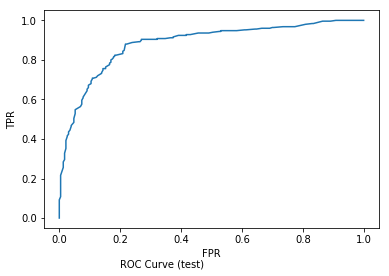

In [198]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
clf = kcross(clf,X_train,y_train,10)


print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

### Logistic Regression

This model has convergence issues and thus the warning in the output. But the best solver was **lbfgs** and maximum iterations of 100.

/home/chawla/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/chawla/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/chawla/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/chawla/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

confusion matrix (validation)= [[  7.7 222.3]
 [  1.2 248.8]]
precision (validation) = 0.5416666666666666
recall (validation) = 0.024686554841332028
F-1 (validation) = 0.04529588299002653
AUC (validation) = 0.5102104806399819


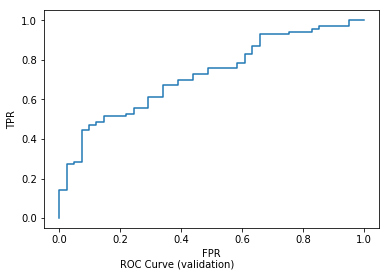

Average Valid Accuracy: = 0.5479005791505791
Train Accuracy 0.550491510277033
Test Accuracy 0.5416666666666666
confusion matrix (test)= [[ 11 219]
 [  1 249]]
precision (test) = 0.9166666666666666
recall (test) = 0.04782608695652174
F-1 (test) = 0.09090909090909091
AUC (test) = 0.5219130434782608


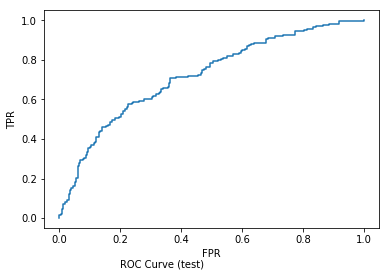

In [199]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial', max_iter = 100)

clf = kcross(clf,X_train,y_train,10)


print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

### K-NN

This model gives the best performance on 'number of neighbors' = 1 but in that case, we don't obtain a good ROC curve. Thus the 'neighbor number' was chosen to be 5. The model performs a little worse but the ROC is more informative.

confusion matrix (validation)= [[153.1  76.9]
 [ 63.6 186.4]]
precision (validation) = 0.6725309619458556
recall (validation) = 0.6398849832189948
F-1 (validation) = 0.6539443918588237
AUC (validation) = 0.688097233380557


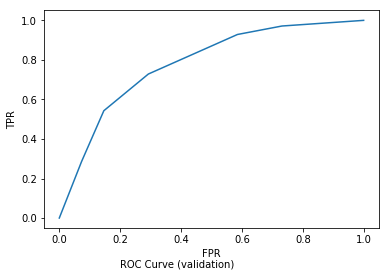

Average Valid Accuracy: = 0.690822072072072
Train Accuracy 0.8123324396782842
Test Accuracy 0.7125
confusion matrix (test)= [[155  75]
 [ 63 187]]
precision (test) = 0.7110091743119266
recall (test) = 0.6739130434782609
F-1 (test) = 0.6919642857142857
AUC (test) = 0.7109565217391304


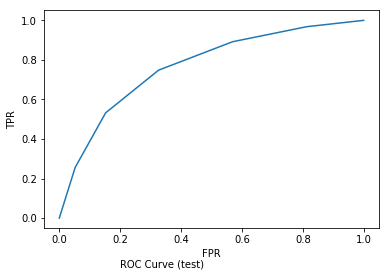

In [200]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

clf = kcross(clf,X_train,y_train,10)

print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

### AdaBoost Classifier

Again in this classifier, the best performing base model is decision tree with a max depth of 1 (default base).

confusion matrix (validation)= [[160.2  69.8]
 [ 57.3 192.7]]
precision (validation) = 0.7175239204861574
recall (validation) = 0.7080958744957851
F-1 (validation) = 0.710289785765372
AUC (validation) = 0.7357337275943601


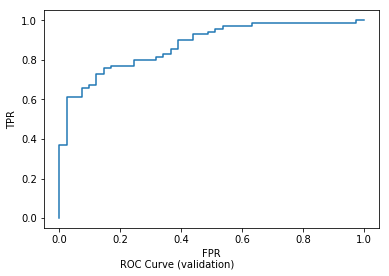

Average Valid Accuracy: = 0.7364221364221365
Train Accuracy 0.7953529937444147
Test Accuracy 0.7479166666666667
confusion matrix (test)= [[165  65]
 [ 56 194]]
precision (test) = 0.746606334841629
recall (test) = 0.717391304347826
F-1 (test) = 0.7317073170731707
AUC (test) = 0.7466956521739131


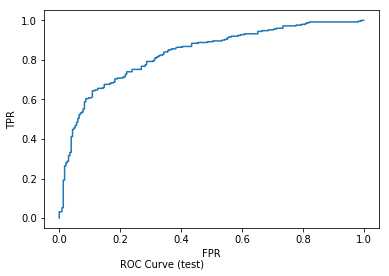

In [202]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
clf = AdaBoostClassifier()
clf = kcross(clf,X_train,y_train,10)
#cv_results = cross_validate(clf, X_train, y_train, cv=3,return_train_score=False)

print('Train Accuracy ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Test Accuracy ' + str(accuracy_score(clf.predict(X_test),y_test)))

print('confusion matrix (test)= '+ str(confusion_matrix(y_test,clf.predict(X_test))))
prfs = precision_recall_fscore_support(y_test,clf.predict(X_test))
print('precision (test) = ' +str(prfs[0][0]))
print('recall (test) = ' +str(prfs[1][0]))
print('F-1 (test) = ' +str(prfs[2][0]))
print('AUC (test) = '+ str(roc_auc_score(y_test,clf.predict(X_test))))
fpr,tpr,th = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fig = plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
fig.text(0.3,-.01,'ROC Curve (test)')
plt.show()

We see that logistic regression has convergence issues. Based on all the metrics together RandomForest and AdaBoost perform the best and RandomForest easily beats AdaBoost. So the final model is RandomForest.